In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


### Loading the required packages

In [2]:
import re
import math
import nltk
from typing import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from pydash import flatten, flatten_deep
from collections import Counter, OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

### Loading the datatsets

In [3]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [4]:
# Returns the first five rows of the dataset

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# train_df.shape

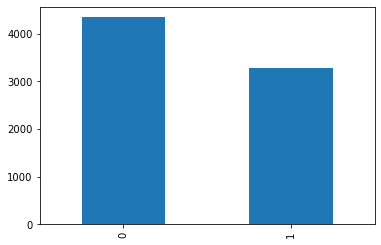

In [6]:
# Checking the count of the target variable using a bar plot

train_df['target'].value_counts().plot.bar()

In [7]:
data_text = list(train_df['text'])

In [8]:
# Reference: https://www.kaggle.com/sauravjoshi23/disaster-tweets-80-263-accuracy-using-svc

def convertTextToLowerCase(text_column):
    
    """
    Returns a list that contains text that is converted to lower case
    
    Parameters:
        
        text_column(list): A text column
        
    Returns:
        
        text(list): list containing text in lower case
        
    """

    lowerCaseText = []
    for token in data_text:
        token = token.lower()
        lowerCaseText.append(token)
        
    return lowerCaseText

text = convertTextToLowerCase(data_text)


In [9]:
# Reference: https://www.kaggle.com/sauravjoshi23/disaster-tweets-80-263-accuracy-using-svc

def tokenizeTextList(text_column):
    
    """
    Returns a list that splits text into tokens
    
    Parameters:
    
        text_column(list): A text column
    
    Return:
    
        tokenizedTextList(list): list containing text which is split into tokens
    
    
    """

    tokenized_word_list = []
    for token in text:
        token = word_tokenize(token)
        tokenized_word_list.append(token)
        
    return tokenized_word_list

text = tokenizeTextList(text)

In [10]:
# Reference: https://www.kaggle.com/sauravjoshi23/disaster-tweets-80-263-accuracy-using-svc

text_punctuations = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''


def removePunctuationsFromText(text_column):
    
    """
    Returns a list containing from which punctuations are removed
    
    Parameters:
    
        text_column(list): A text column
    
    Return:
    
        removePunctuationsFromText(list): list containing text in which punctuations are removed
    
    """
    
    
    text_without_punctuations = []

    for token_list in text:
        word_list = []
        for words in token_list:
            for char in words:
                if char in text_punctuations:
                    words = words.replace(char, "")
            if len(words) > 0:
                word_list.append(words)
        text_without_punctuations.append(word_list)
        
    return text_without_punctuations
    
text = removePunctuationsFromText(text)

In [11]:
# remove stopwords

# Reference: # Reference: https://www.kaggle.com/sauravjoshi23/disaster-tweets-80-263-accuracy-using-svc

def removeStopWords(text_column):
    
    """
    Returns a list containing text from which stop words are removed
    
    Parameters:
    
        text_column(list): A text column
    
    Return:
    
        text_without_stopwords(list): list containing text from which stop words are removed
    
    
    """
    
    text_without_stopwords = []

    for token_list in text:
        word_list = []
        for words in token_list:
            if words not in stopwords.words("english"):
                word_list.append(words)
        text_without_stopwords.append(word_list)
        
    return text_without_stopwords
    
text = removeStopWords(text)

In [12]:
# Lemmatization

# Reference: # Reference: https://www.kaggle.com/sauravjoshi23/disaster-tweets-80-263-accuracy-using-svc


def lemmatizeText(text_column):
    
    """
    Returns a list contaning text in which words are changed to their original form. For example, words like car's, cars are
    converted to 'car'
    
    Parameters:
    
        text_column(list): A text column
        
    Return:
        
        lemmatized_text_list(list): A list containing text in which words are changed to their original form
    
    """
    
    wordNetLemmatizer = WordNetLemmatizer()
    
    lemmatized_text_list = []
    
    for token_list in text_column:
        word_list = []
        for word in token_list:
            word_list.append(wordNetLemmatizer.lemmatize(word))

        lemmatized_text_list.append(word_list)
        
    return lemmatized_text_list


text = lemmatizeText(text)

In [13]:
# Joining multiple string lists into a single list

text_list = []
for token_list in text:
    string = ' '.join(token_list)
    text_list.append(string)
    
text = text_list

In [14]:
text

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 '13000 people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update = california hwy 20 closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happening building across street',
 'afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa 18 19 day lost count',
 'flood bago myanmar arrived bago',
 'damage school bus 80 multi car crash breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skiin

In [15]:
# Vectorizing the text

tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (1, 2))
X_tfid = tfidf_vectorizer.fit_transform(text).toarray()


In [16]:
X_tfid[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y = list(train_df['target'])

In [18]:
# Splitting data in train and test splits

X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size = 0.2, random_state = 999)

In [19]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (6090, 5000)
X_test shape:  (1523, 5000)


In [20]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(X_train, y_train)

y_pred_lr = logisticRegression_model.predict(X_test)

logistic_reg_accuracy_score = round(accuracy_score(y_test, y_pred_lr), 3)


In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
naive_bayes_accuracy_score = round(accuracy_score(y_test, y_pred_nb), 3)


In [22]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 999)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
random_forest_accuracy_score = round(accuracy_score(y_test, y_pred_rf), 3)

### Model comparison using a dataframe

In [23]:
accuracy_table = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
                             'Accuracy Score': [logistic_reg_accuracy_score, naive_bayes_accuracy_score,
                                               random_forest_accuracy_score]})

In [24]:
accuracy_table

,Model,Accuracy Score
0,Logistic Regression,0.798
1,Naive Bayes,0.798
2,Random Forest,0.785
